# Bayes - 2

#### Pre NN on Keras

In [20]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import SGD

## Data

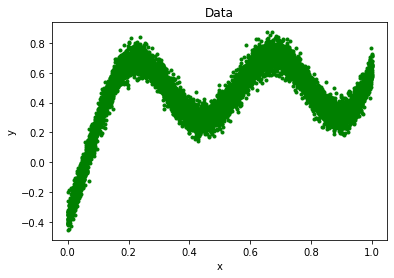

In [40]:
n = 10000
X = np.linspace(0, 1, n)
def gen_Y(X, noise=False):
    noise_data = np.random.normal(0, 0.02)
    data = list()
    for x_ in X:
        y = x_ + 0.3*np.sin(2*np.pi*(x_ + noise_data)) + 0.3*np.sin(4*np.pi*(x_ + noise_data)) + noise_data
        if not noise:
            data.append(y)
        else:
            data.append(np.random.normal(y, noise))
    return np.array(data)
plt.title('Data')
plt.plot(X, gen_Y(X, noise=0.05), 'g.')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## Train


 *****************************************************************
batch_size: 10
layer_size: 50
training_steps: 3000
learning_rate: 1e-05


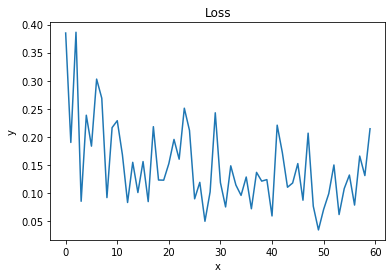

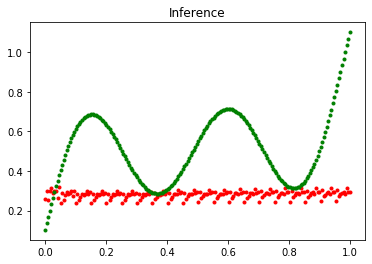


 *****************************************************************
batch_size: 50
layer_size: 50
training_steps: 3000
learning_rate: 1e-05


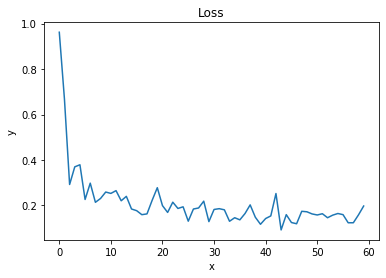

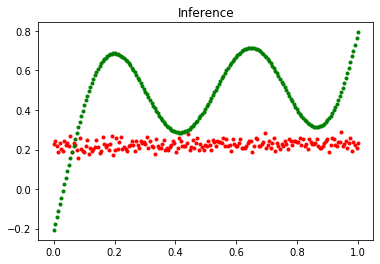

In [42]:
Batch_size = (10, 50)
Layer_size = (50,)
Training_steps = (3000,)
L_r = (0.00001,)
for batch_size in Batch_size:
    for layer_size in Layer_size:
        for training_steps in Training_steps:
            for l_r in L_r:
                print('\n', '*'*65)
                print('batch_size:', batch_size)
                print('layer_size:', layer_size)
                print('training_steps:', training_steps)
                print('learning_rate:', l_r)
                model = Sequential()
                model.add(Dense(layer_size, input_shape=(batch_size,), activation='tanh'))
                model.add(Dropout(0.4))
                model.add(Dense(layer_size, activation='relu'))
                model.add(Dropout(0.4))
                model.add(Dense(batch_size, activation='tanh'))
                model.add(Dropout(0.4))
                opt = SGD(learning_rate=l_r)
                model.compile(optimizer='sgd', loss='mse')

                Loss = list()
                for step in range(training_steps):
                    x = np.reshape(np.array([X[np.random.randint(len(X))] for i in range(batch_size)]), (1, batch_size))
                    y_true = gen_Y(x).reshape(1, batch_size)
                    loss = model.train_on_batch(x, y_true)
                    if step % 50 == 0:
                        Loss.append(loss)
                plt.title('Loss')
                plt.plot(Loss)
                plt.xlabel('x')
                plt.ylabel('y')
                plt.show()
                
                
                XX = np.linspace(0, 1, 200)
                X_infer = np.reshape(XX[:batch_size], (1, batch_size))
                Y_infer = model.predict(X_infer) 
                for i in range(batch_size, n, batch_size):
                    if i > len(XX) - batch_size:
                        break
                    x_infer = np.reshape(XX[i: i + batch_size], (1, batch_size))
                    X_infer = np.concatenate((X_infer, x_infer), axis=1)
                    y_infer = model.predict(x_infer)
                    Y_infer = np.concatenate((Y_infer, y_infer), axis=1)
                plt.title('Inference')
                plt.plot(X_infer, Y_infer, 'r.')
                plt.plot(X_infer, gen_Y(X_infer), 'g.')
                plt.show()